In [1]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

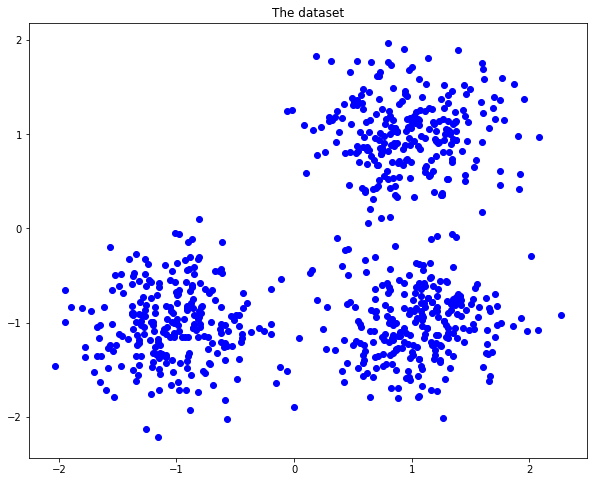

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
# 生成n=750个样本，每个样本的特征个数为d=2，并返回每个样本的真实类别
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c='b')
plt.title('The dataset')
plt.show()

In [3]:
Z = linkage(X,  method='ward', metric='euclidean')


In [4]:
print(Z.shape)



(749, 4)


In [5]:
print(Z[: 25])



[[2.53000000e+02 4.91000000e+02 1.84993036e-03 2.00000000e+00]
 [4.52000000e+02 6.96000000e+02 2.82657550e-03 2.00000000e+00]
 [7.00000000e+01 3.34000000e+02 3.74286557e-03 2.00000000e+00]
 [2.37000000e+02 7.09000000e+02 3.78397226e-03 2.00000000e+00]
 [2.44000000e+02 5.89000000e+02 4.23492871e-03 2.00000000e+00]
 [1.41000000e+02 5.50000000e+02 4.24101941e-03 2.00000000e+00]
 [1.95000000e+02 6.72000000e+02 4.31442235e-03 2.00000000e+00]
 [7.10000000e+01 1.02000000e+02 4.96201229e-03 2.00000000e+00]
 [3.07000000e+02 4.76000000e+02 5.35774381e-03 2.00000000e+00]
 [3.51000000e+02 5.52000000e+02 5.71410172e-03 2.00000000e+00]
 [6.20000000e+01 7.15000000e+02 6.07415475e-03 2.00000000e+00]
 [9.80000000e+01 4.33000000e+02 6.50009461e-03 2.00000000e+00]
 [2.55000000e+02 5.72000000e+02 6.71405886e-03 2.00000000e+00]
 [4.37000000e+02 6.99000000e+02 6.84899193e-03 2.00000000e+00]
 [5.50000000e+01 4.98000000e+02 7.65462455e-03 2.00000000e+00]
 [1.43000000e+02 7.34000000e+02 8.23270710e-03 2.000000

In [6]:
print(X[[141, 550, 503]])



[[ 1.27098487 -0.97927184]
 [ 1.27515256 -0.98005709]
 [ 1.37273935  1.13598599]]


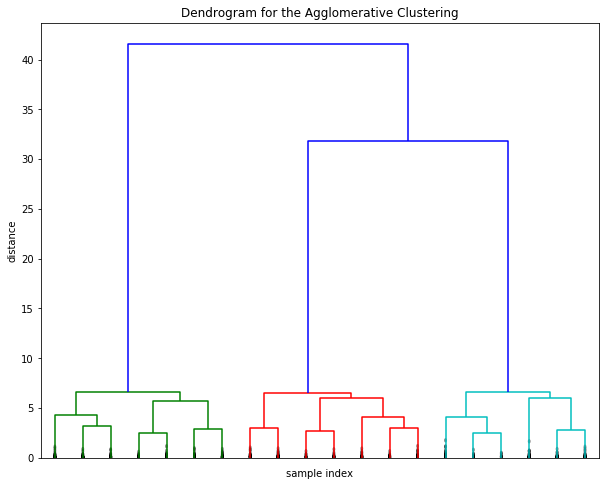

In [7]:
plt.figure(figsize=(10, 8))
dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=False, leaf_rotation=90, leaf_font_size=15, show_contracted=True)
plt.title('Dendrogram for the Agglomerative Clustering')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()


In [8]:
d = 15
labels_1 = fcluster(Z, t=d, criterion='distance')
print(labels_1[: 100]) # 打印聚类结果

[2 1 2 3 2 1 1 3 2 2 1 1 1 3 1 2 1 1 3 3 3 3 3 3 1 1 3 2 2 3 2 1 1 2 1 2 3
 2 2 3 3 1 1 1 1 1 2 3 2 1 3 3 1 1 3 3 1 2 3 1 3 3 3 3 3 2 3 3 2 2 2 3 2 2
 3 1 2 1 2 3 1 1 2 2 2 2 1 3 1 3 3 2 1 2 1 2 1 1 2 2]


In [9]:
print(len(set(labels_1)))   # 看看在该临界距离下有几个 cluster



3


In [10]:
# 根据聚类数目返回聚类结果
k = 3
labels_2 = fcluster(Z, t=k, criterion='maxclust')
print(labels_2[: 100])  



[2 1 2 3 2 1 1 3 2 2 1 1 1 3 1 2 1 1 3 3 3 3 3 3 1 1 3 2 2 3 2 1 1 2 1 2 3
 2 2 3 3 1 1 1 1 1 2 3 2 1 3 3 1 1 3 3 1 2 3 1 3 3 3 3 3 2 3 3 2 2 2 3 2 2
 3 1 2 1 2 3 1 1 2 2 2 2 1 3 1 3 3 2 1 2 1 2 1 1 2 2]


In [11]:
list(labels_1) == list(labels_2)      # 看看两种不同维度下得到的聚类结果是否一致



True

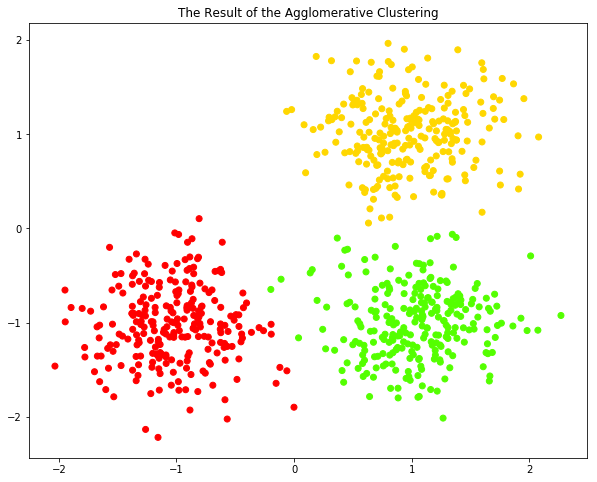

In [12]:
plt.figure(figsize=(10, 8))
plt.title('The Result of the Agglomerative Clustering')
plt.scatter(X[:, 0], X[:, 1], c=labels_2, cmap='prism')
plt.show()

